In [1]:
import os
import pandas as pd

data_dir = "Data_csv"
dataframes = []

for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Print
print(combined_df)
print(combined_df.describe())

      Video ID   Time (s) Center X Center Y Radius
0           26   0.800000      594      246     62
1           26   0.833333      608      196     62
2           26   0.866667      578      202     62
3           26   0.900000      578      202     62
4           26   0.933333      578      202     62
...        ...        ...      ...      ...    ...
53758       17  31.433333      710      344     58
53759       17  31.466667      710      344     58
53760       17  31.500000      710      344     58
53761       17  31.533333      710      344     58
53762       17  31.566667      710      344     58

[53763 rows x 5 columns]
           Time (s)
count  53763.000000
mean      16.682681
std       10.235142
min        0.000000
25%        8.100000
50%       15.933333
75%       24.766667
max       54.033333


In [2]:
sorted_df = combined_df.sort_values('Video ID')
print(sorted_df)

      Video ID   Time (s) Center X Center Y Radius
30211        0  24.533333      816      550     61
30130        0  20.400000     1106      510     61
30131        0  20.666667      762      646     58
30132        0  20.700000      778      648     62
30133        0  20.733333      778      648     62
...        ...        ...      ...      ...    ...
41825       74  10.366667      550      120     52
41824       74  10.366667      472       64     56
41823       74  10.366667      434       70     66
41803       74  10.166667      406      198     51
41560       74   7.800000      198      302     58

[53763 rows x 5 columns]


In [3]:
filtered_df = combined_df[combined_df['Time (s)'] < 1]
print(filtered_df)

      Video ID  Time (s) Center X Center Y Radius
0           26  0.800000      594      246     62
1           26  0.833333      608      196     62
2           26  0.866667      578      202     62
3           26  0.900000      578      202     62
4           26  0.933333      578      202     62
...        ...       ...      ...      ...    ...
53207       17  0.733333      388      338     62
53208       17  0.766667      398      304     56
53209       17  0.900000      402      282     58
53210       17  0.933333      402      284     60
53211       17  0.966667      402      284     60

[1436 rows x 5 columns]


In [4]:
center_counts = filtered_df.groupby(['Center X', 'Center Y']).size().reset_index(name='Count')
highest_frequency = center_counts.sort_values('Count', ascending=False).iloc[0]
highest_frequency_center_x = highest_frequency['Center X']
highest_frequency_center_y = highest_frequency['Center Y']

print("The highest frequency Center X within 1 second is:", highest_frequency_center_x)
print("The highest frequency Center Y within 1 second is:", highest_frequency_center_y)

The highest frequency Center X within 1 second is: 332
The highest frequency Center Y within 1 second is: 648


In [5]:
import matplotlib.pyplot as plt

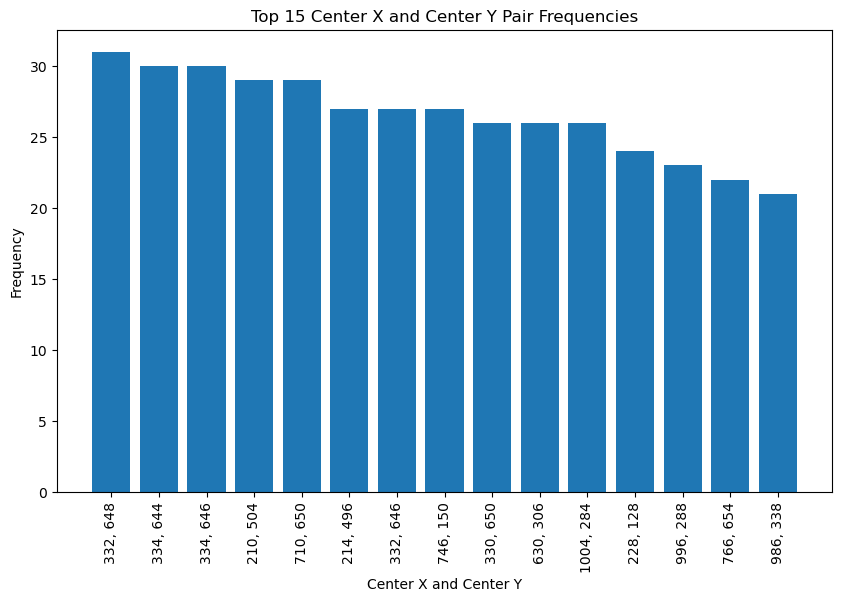

In [6]:
top_frequencies = filtered_df.groupby(['Center X', 'Center Y']).size().reset_index(name='Frequency').nlargest(15, 'Frequency')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_frequencies)), top_frequencies['Frequency'])
plt.xlabel('Center X and Center Y')
plt.ylabel('Frequency')
plt.title('Top 15 Center X and Center Y Pair Frequencies')
plt.xticks(range(len(top_frequencies)), [f"{x}, {y}" for x, y in zip(top_frequencies['Center X'], top_frequencies['Center Y'])], rotation=90)
plt.show()

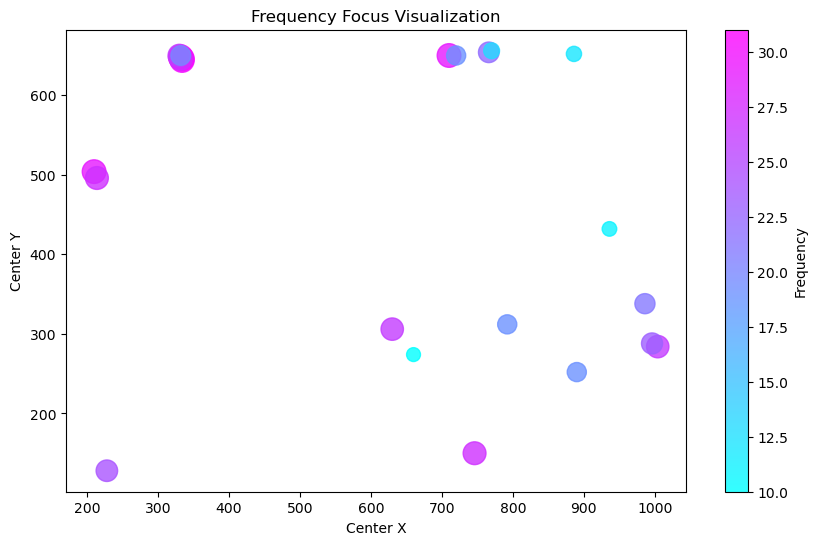

In [7]:
frequency_df = filtered_df.groupby(['Center X', 'Center Y']).size().reset_index(name='Frequency')

frequency_df = frequency_df.sort_values('Frequency', ascending=False)

threshold = 10
frequency_df = frequency_df[frequency_df['Frequency'] >= threshold]

colors = frequency_df['Frequency']

plt.figure(figsize=(10, 6))
plt.scatter(frequency_df['Center X'], frequency_df['Center Y'], s=frequency_df['Frequency']*10, c=colors, cmap='cool', alpha=0.8)
plt.xlabel('Center X')
plt.ylabel('Center Y')
plt.title('Frequency Focus Visualization')
plt.colorbar(label='Frequency')
plt.show()

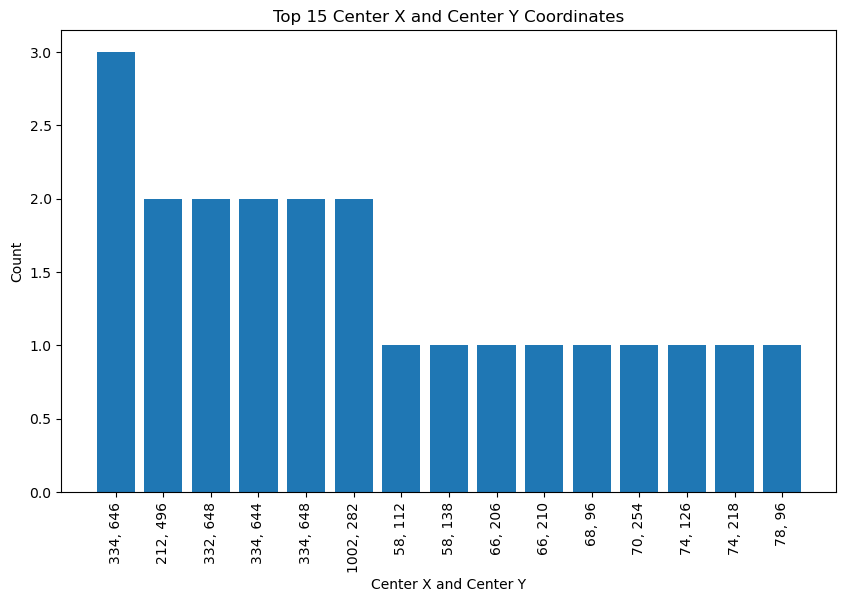

In [8]:
unique_frequency = filtered_df.groupby(['Video ID', 'Center X', 'Center Y']).size().reset_index(name='Frequency')

top_coordinates = unique_frequency.groupby(['Center X', 'Center Y']).size().reset_index(name='Count').nlargest(15, 'Count')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_coordinates)), top_coordinates['Count'])
plt.xlabel('Center X and Center Y')
plt.ylabel('Count')
plt.title('Top 15 Center X and Center Y Coordinates')
plt.xticks(range(len(top_coordinates)), [f"{x}, {y}" for x, y in zip(top_coordinates['Center X'], top_coordinates['Center Y'])], rotation=90)
plt.show()


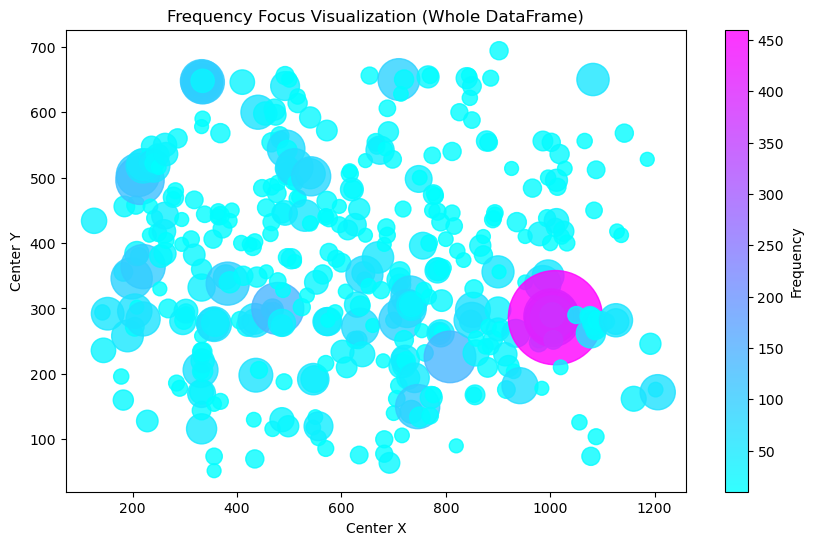

In [9]:
frequency_df = combined_df.groupby(['Center X', 'Center Y']).size().reset_index(name='Frequency')

threshold = 10
frequency_df = frequency_df[frequency_df['Frequency'] >= threshold]

colors = frequency_df['Frequency']

plt.figure(figsize=(10, 6))
plt.scatter(frequency_df['Center X'], frequency_df['Center Y'], s=frequency_df['Frequency']*10, c=colors, cmap='cool', alpha=0.8)
plt.xlabel('Center X')
plt.ylabel('Center Y')
plt.title('Frequency Focus Visualization (Whole DataFrame)')
plt.colorbar(label='Frequency')
plt.show()
 

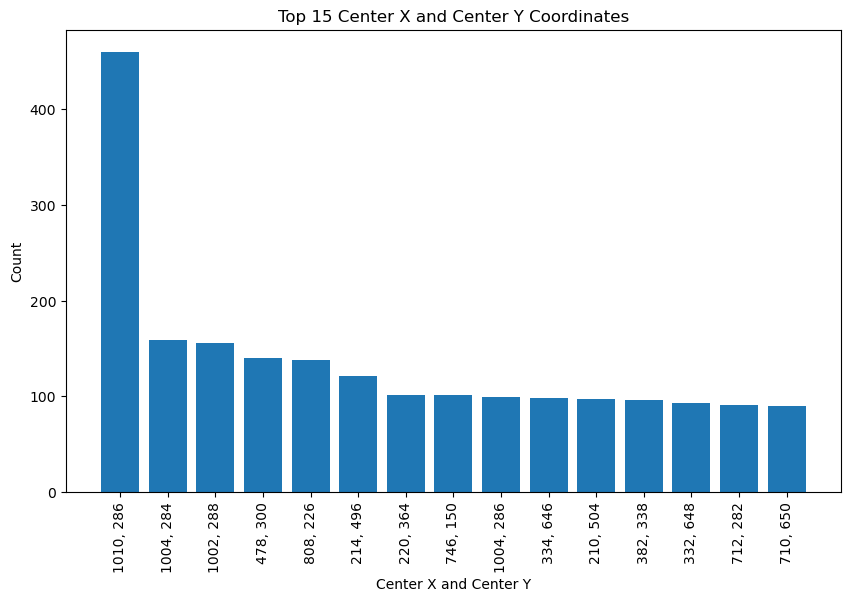

In [10]:
top_coordinates = combined_df.groupby(['Center X', 'Center Y']).size().reset_index(name='Count').nlargest(15, 'Count')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_coordinates)), top_coordinates['Count'])
plt.xlabel('Center X and Center Y')
plt.ylabel('Count')
plt.title('Top 15 Center X and Center Y Coordinates')
plt.xticks(range(len(top_coordinates)), [f"{x}, {y}" for x, y in zip(top_coordinates['Center X'], top_coordinates['Center Y'])], rotation=90)
plt.show()


       Center X  Center Y                 Time Diff
17028       252       282    0 days 00:00:32.800000
17493       944       450    0 days 00:00:29.500000
21029       738       502 0 days 00:00:23.833333334
17514       212       196 0 days 00:00:11.066666667
16829      1010       286 0 days 00:00:08.700000001
17731       892       640    0 days 00:00:05.500000
1294        478       300 0 days 00:00:04.800000001
19387      1002       288    0 days 00:00:04.600000
28153       334       204 0 days 00:00:04.333333334
20964      1118       338 0 days 00:00:04.133333333


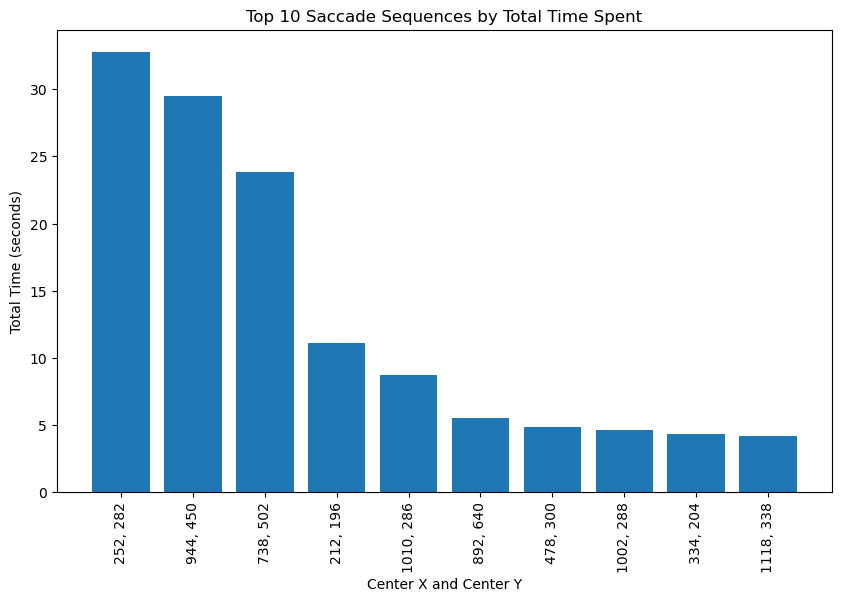

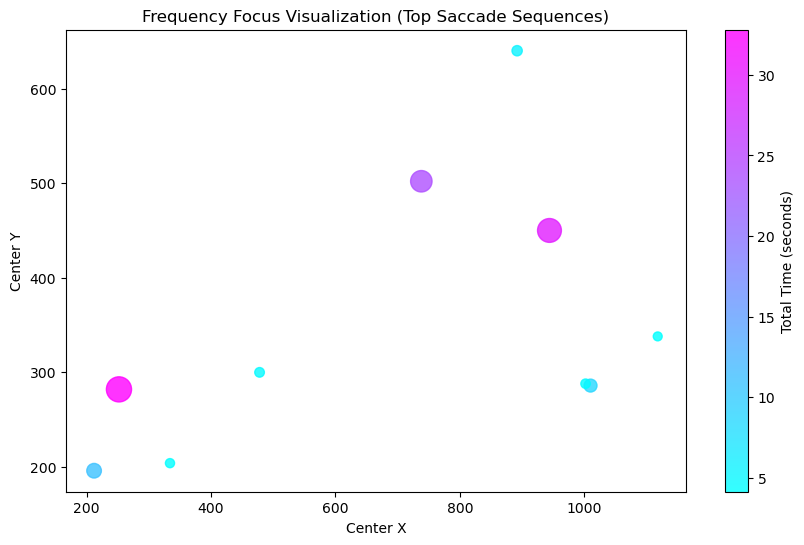

In [11]:
import pandas as pd

combined_df['Time (s)'] = pd.to_datetime(combined_df['Time (s)'], unit='s')
combined_df['Time Diff'] = combined_df['Time (s)'].diff()
threshold = pd.Timedelta(seconds=1)
combined_df['Saccade'] = combined_df['Time Diff'] > threshold
combined_df['Saccade ID'] = combined_df['Saccade'].cumsum()

saccade_times = combined_df.groupby(['Saccade ID', 'Center X', 'Center Y'])['Time Diff'].sum().reset_index()
top_saccades = saccade_times.sort_values('Time Diff', ascending=False).head(10)

print(top_saccades[['Center X', 'Center Y', 'Time Diff']])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_saccades)), top_saccades['Time Diff'].dt.total_seconds())
plt.xlabel('Center X and Center Y')
plt.ylabel('Total Time (seconds)')
plt.title('Top 10 Saccade Sequences by Total Time Spent')
plt.xticks(range(len(top_saccades)), [f"{x}, {y}" for x, y in zip(top_saccades['Center X'], top_saccades['Center Y'])], rotation=90)
plt.show()

colors = top_saccades['Time Diff'].dt.total_seconds()

plt.figure(figsize=(10, 6))
plt.scatter(top_saccades['Center X'], top_saccades['Center Y'], s=top_saccades['Time Diff'].dt.total_seconds()*10, c=colors, cmap='cool', alpha=0.8)
plt.xlabel('Center X')
plt.ylabel('Center Y')
plt.title('Frequency Focus Visualization (Top Saccade Sequences)')
plt.colorbar(label='Total Time (seconds)')
plt.show()

In [12]:
max_width = combined_df['Center X'].max()
max_height = combined_df['Center Y'].max()

min_width = combined_df['Center X'].min()
min_height = combined_df['Center Y'].min()

print("Max Width:", max_width)
print("Max Height:", max_height)
print("Min Height:", min_height)
print("Min Width:", min_width)


Max Width: 1260
Max Height: 702
Min Height: 22
Min Width: 4


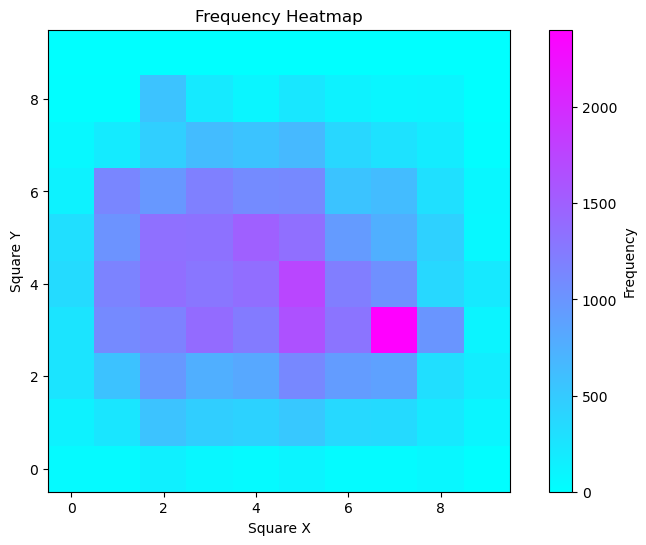

Top 10 Square Regions:
Square X: 5, Square Y: 5
Square X: 2, Square Y: 3


In [13]:
import numpy as np
import matplotlib.pyplot as plt

width = 1280
height = 800
num_squares = 10
square_width = width // num_squares
square_height = height // num_squares
x = np.arange(0, width, square_width)
y = np.arange(0, height, square_height)
X, Y = np.meshgrid(x, y)
frequency_matrix = np.zeros((num_squares, num_squares))
for _, row in combined_df.iterrows():
    center_x = row['Center X']
    center_y = row['Center Y']
    square_x = int(center_x // square_width)
    square_y = int(center_y // square_height)
    frequency_matrix[square_y, square_x] += 1
cmap = plt.cm.get_cmap('cool')
plt.figure(figsize=(10, 6))
plt.imshow(frequency_matrix, cmap=cmap, origin='lower')
plt.colorbar(label='Frequency')
plt.title('Frequency Heatmap')
plt.xlabel('Square X')
plt.ylabel('Square Y')
plt.show()
top_regions = np.unravel_index(np.argsort(frequency_matrix, axis=None)[-10:], frequency_matrix.shape)
print("Top 10 Square Regions:")
for region in top_regions:
    print(f"Square X: {region[1]}, Square Y: {region[0]}")
